# Fuzzy Sepsis Project

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns

### Read Data

In [3]:
sepsis_path = "dataset/sepsis/"
no_sepsis_path = "dataset/no_sepsis"

In [4]:
def read_df(folder_path):
    dfs = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            dfs.append(df)
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

In [5]:
sepsis_df = read_df(sepsis_path)
no_sepsis_df = read_df(no_sepsis_path)

### Visualizing Data

In [6]:
sepsis_df

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111.0,123.0,75.0,87.0,24.0,32.555555,100.0,NaN,10.6,40.0,...,11.0,10.2,31.5,3.1,121.0,3.0,70.48,1.0,1.0,1.0
2,109.0,120.0,66.0,81.0,23.0,32.888887,100.0,NaN,10.6,40.0,...,11.0,10.2,31.5,3.1,121.0,3.0,70.48,1.0,1.0,1.0
3,68.0,142.0,84.0,96.0,16.0,33.722221,100.0,NaN,10.6,40.0,...,11.0,10.2,31.5,3.1,121.0,3.0,70.48,0.0,0.0,1.0
4,80.0,84.0,50.0,88.0,20.0,35.277778,100.0,NaN,10.6,40.0,...,11.0,10.2,31.5,3.1,121.0,3.0,70.48,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,84.0,93.0,57.0,70.0,24.0,36.722221,100.0,NaN,3.8,9.0,...,20.0,8.5,25.0,4.1,98.0,3.0,41.19,1.0,1.0,1.0
23996,81.0,93.0,57.0,70.0,24.0,36.722221,100.0,NaN,3.8,9.0,...,20.0,8.5,25.0,4.1,98.0,3.0,41.19,1.0,1.0,1.0
23997,77.0,98.0,61.0,74.0,24.0,36.722221,98.0,NaN,3.1,10.0,...,18.0,7.9,23.6,4.3,102.0,3.0,41.19,1.0,1.0,1.0
23998,77.0,93.0,57.0,70.0,24.0,36.722221,98.0,NaN,3.1,10.0,...,18.0,7.9,23.6,4.3,102.0,3.0,41.19,1.0,1.0,1.0


In [7]:
no_sepsis_df

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
0,113.0,90.0,70.0,74.0,16.0,35.944444,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,71.88,1.0,0.0,0.0
1,111.0,96.0,60.0,69.0,17.0,35.944444,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.0,71.88,1.0,0.0,0.0
2,116.0,87.0,54.0,62.0,26.0,35.944444,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.0,71.88,1.0,1.0,0.0
3,117.0,98.0,80.0,84.0,13.0,35.944444,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.0,71.88,1.0,0.0,0.0
4,116.0,81.0,56.0,62.0,15.0,35.944444,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.0,71.88,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,77.0,88.0,59.0,68.0,14.0,38.099998,99.0,NaN,13.7,13.0,...,27.0,10.7,29.4,4.3,108.0,8.0,54.37,0.0,1.0,0.0
23996,81.0,102.0,69.0,79.0,14.0,38.000000,99.0,NaN,13.7,13.0,...,27.0,10.7,29.4,4.3,108.0,8.0,54.37,0.0,0.0,0.0
23997,83.0,117.0,77.0,89.0,18.0,37.799999,100.0,NaN,13.7,13.0,...,27.0,10.7,29.4,4.3,108.0,11.0,54.37,0.0,0.0,0.0
23998,84.0,116.0,76.0,88.0,14.0,37.900002,100.0,NaN,13.7,13.0,...,27.0,10.7,29.4,4.3,108.0,11.0,54.37,0.0,0.0,0.0


In [8]:
concat_df = pd.concat([sepsis_df, no_sepsis_df], axis=0)
concat_df

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111.0,123.0,75.0,87.0,24.0,32.555555,100.0,NaN,10.6,40.0,...,11.0,10.2,31.5,3.1,121.0,3.0,70.48,1.0,1.0,1.0
2,109.0,120.0,66.0,81.0,23.0,32.888887,100.0,NaN,10.6,40.0,...,11.0,10.2,31.5,3.1,121.0,3.0,70.48,1.0,1.0,1.0
3,68.0,142.0,84.0,96.0,16.0,33.722221,100.0,NaN,10.6,40.0,...,11.0,10.2,31.5,3.1,121.0,3.0,70.48,0.0,0.0,1.0
4,80.0,84.0,50.0,88.0,20.0,35.277778,100.0,NaN,10.6,40.0,...,11.0,10.2,31.5,3.1,121.0,3.0,70.48,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,77.0,88.0,59.0,68.0,14.0,38.099998,99.0,NaN,13.7,13.0,...,27.0,10.7,29.4,4.3,108.0,8.0,54.37,0.0,1.0,0.0
23996,81.0,102.0,69.0,79.0,14.0,38.000000,99.0,NaN,13.7,13.0,...,27.0,10.7,29.4,4.3,108.0,8.0,54.37,0.0,0.0,0.0
23997,83.0,117.0,77.0,89.0,18.0,37.799999,100.0,NaN,13.7,13.0,...,27.0,10.7,29.4,4.3,108.0,11.0,54.37,0.0,0.0,0.0
23998,84.0,116.0,76.0,88.0,14.0,37.900002,100.0,NaN,13.7,13.0,...,27.0,10.7,29.4,4.3,108.0,11.0,54.37,0.0,0.0,0.0


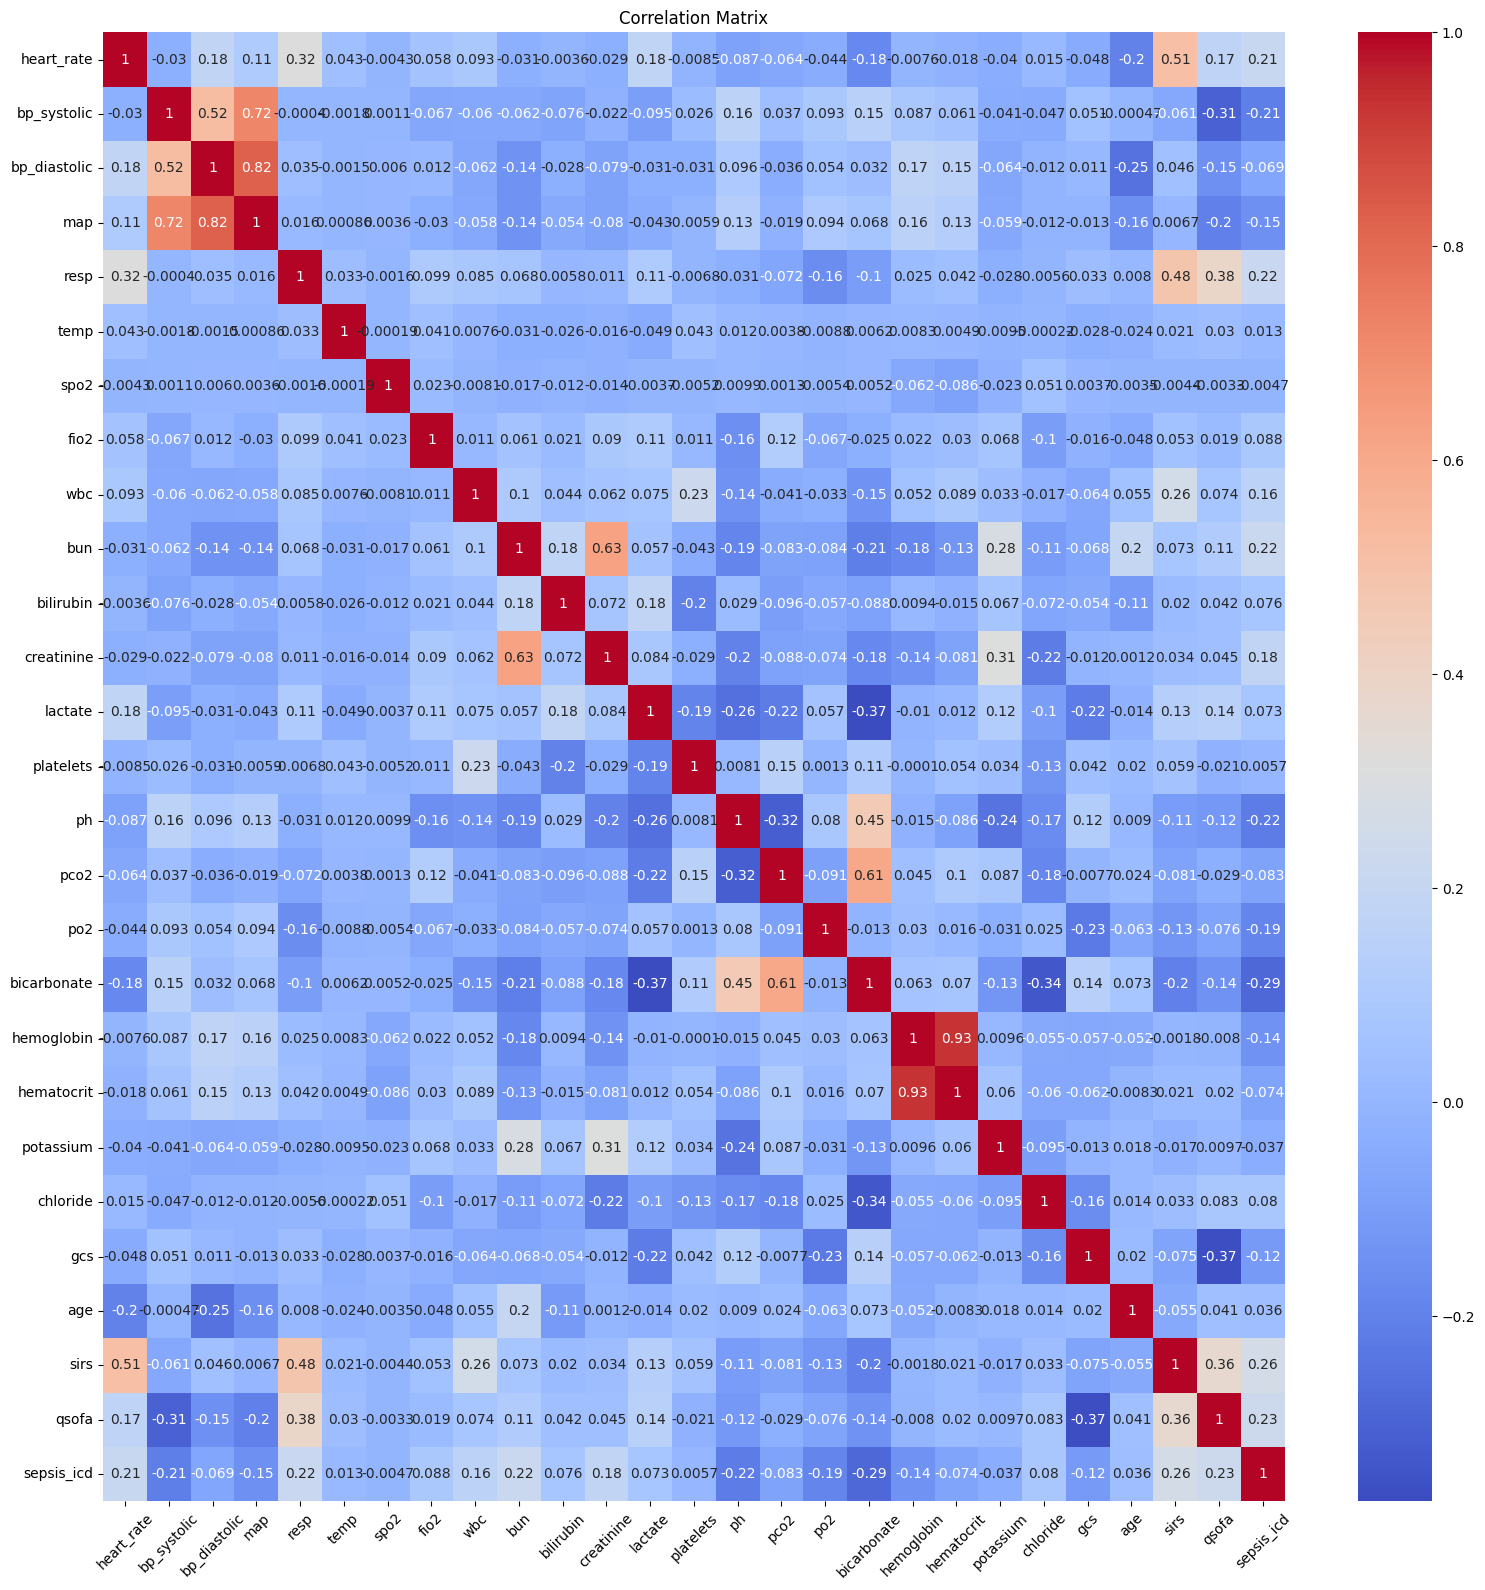

In [9]:

# Calculate correlation coefficients
correlation_matrix = concat_df.corr()

# Set figure size
plt.figure(figsize=(16, 16))

# Visualize correlation matrix as a heatmap with larger font size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 10})
plt.title("Correlation Matrix")

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Adjust the position of the colorbar
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=600)
# Display the heatmap
plt.show()

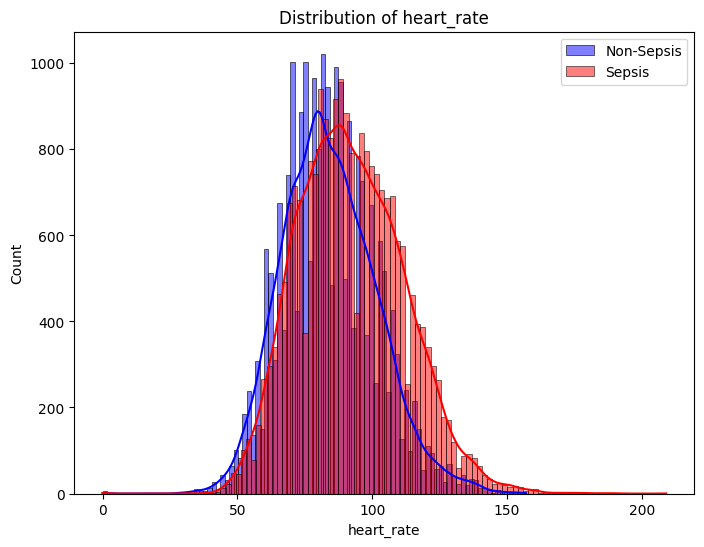

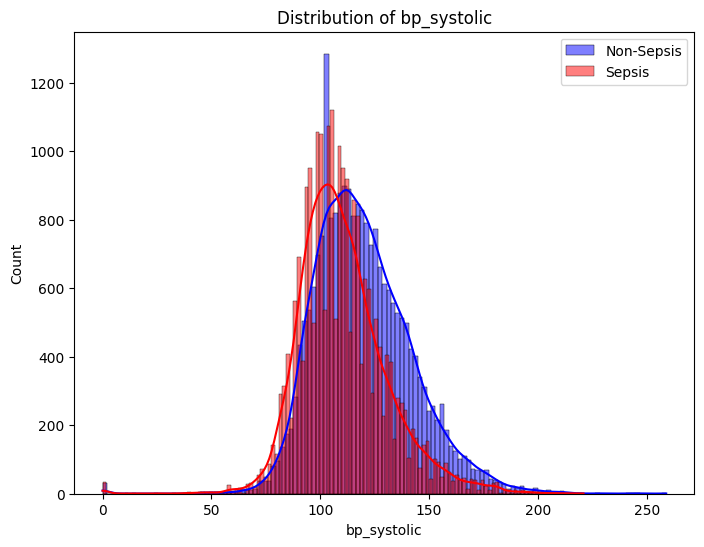

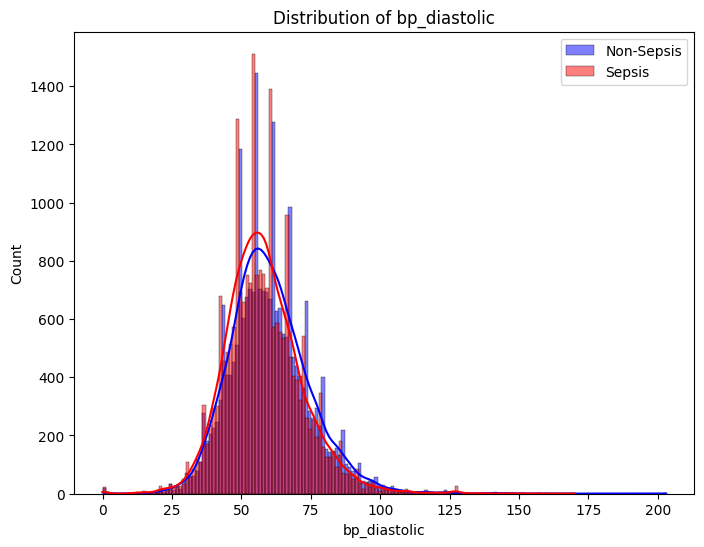

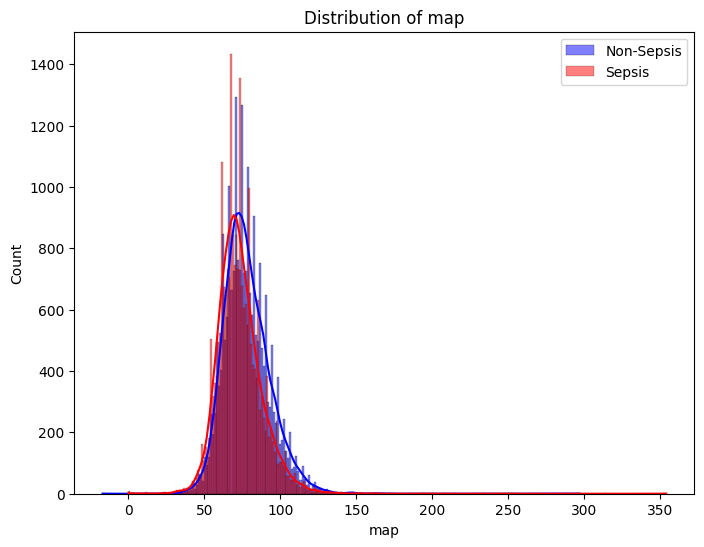

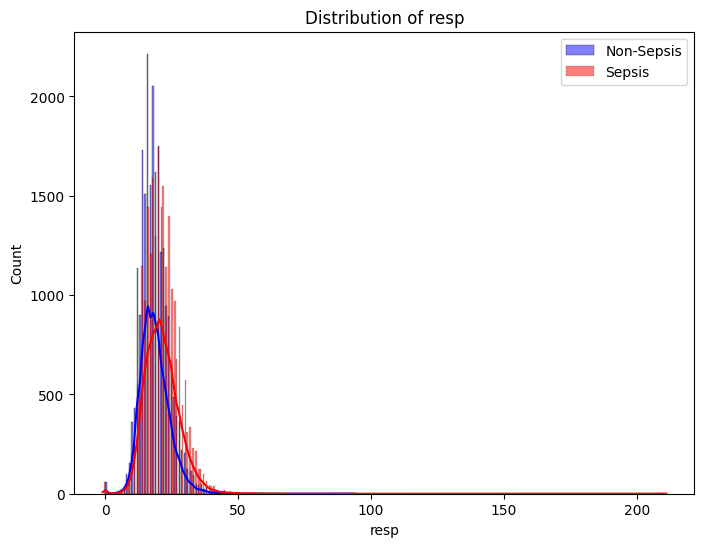

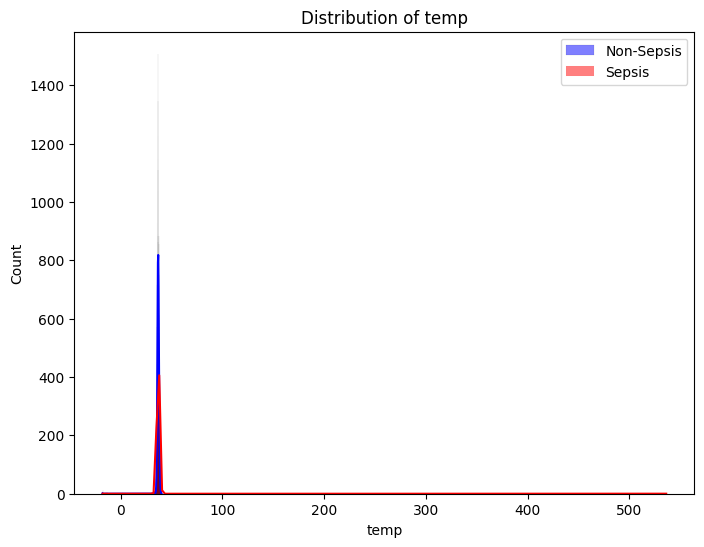

KeyboardInterrupt: 

In [10]:
for column in concat_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=no_sepsis_df, x=column, kde=True, color="blue", label="Non-Sepsis")
    sns.histplot(data=sepsis_df, x=column, kde=True, color="red", label="Sepsis")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend()
    plt.show()

In [9]:
summary = concat_df.describe().loc[["min", "max", "std"]]

# Count positive and negative instances
positive_instances = concat_df[concat_df["sepsis_icd"] == 1].shape[0]
negative_instances = concat_df[concat_df["sepsis_icd"] == 0].shape[0]

# Print the results
print("Statistical Summary:")
print(summary)
print("\nNumber of Positive Instances (Sepsis):", positive_instances)
print("Number of Negative Instances (Non-Sepsis):", negative_instances)

Statistical Summary:
     heart_rate  bp_systolic  bp_diastolic         map        resp  \
min    0.000000      0.00000      0.000000  -17.000000   -1.000000   
max  209.000000    259.00000    203.000000  354.000000  211.000000   
std   18.965446     21.89257     14.197554   15.280422    6.112566   

           temp           spo2        fio2         wbc         bun  ...  \
min  -17.777778       0.000000    0.000000    0.100000    2.000000  ...   
max  536.388889  981023.000000  100.000000  186.600000  240.000000  ...   
std    5.048953    4594.767372   19.907109    9.594259   23.725565  ...   

     bicarbonate  hemoglobin  hematocrit  potassium    chloride        gcs  \
min     6.000000    3.200000   11.800000    1.40000   75.000000   3.000000   
max    48.000000   18.300000   58.800000    9.90000  138.000000  15.000000   
std     4.897231    1.844741    5.278869    0.64139    6.360135   3.876893   

          age      sirs    qsofa  sepsis_icd  
min  18.11000  0.000000  0.00000    0

### Preprocess Data

##### Drop Columns and rows

In [10]:
nans = concat_df.isna().sum()
nans

heart_rate       2254
bp_systolic      2336
bp_diastolic     2337
map              2367
resp             2163
temp             3492
spo2             2423
fio2            37529
wbc             11626
bun             10646
bilirubin       31952
creatinine      10591
lactate         24700
platelets       11064
ph              21348
pco2            22501
po2             22495
bicarbonate     10705
hemoglobin      10524
hematocrit      10226
potassium        8929
chloride        10023
gcs              3992
age              1195
sirs             1195
qsofa            1195
sepsis_icd       1195
dtype: int64

In [11]:
columns_will_be_dropped = list(nans[nans > 12000].index)
columns_will_be_dropped

['fio2', 'bilirubin', 'lactate', 'ph', 'pco2', 'po2']

In [12]:
columns_will_be_dropped.extend(["sirs", "qsofa"])

In [13]:
concat_df_dropped = concat_df.drop(columns_will_be_dropped, axis=1).dropna()
concat_df_dropped

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,wbc,bun,creatinine,platelets,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sepsis_icd
1,111.0,123.0,75.0,87.0,24.0,32.555555,100.0,10.6,40.0,1.3,61.0,11.0,10.2,31.5,3.1,121.0,3.0,70.48,1.0
2,109.0,120.0,66.0,81.0,23.0,32.888887,100.0,10.6,40.0,1.3,61.0,11.0,10.2,31.5,3.1,121.0,3.0,70.48,1.0
3,68.0,142.0,84.0,96.0,16.0,33.722221,100.0,10.6,40.0,1.3,61.0,11.0,10.2,31.5,3.1,121.0,3.0,70.48,1.0
4,80.0,84.0,50.0,88.0,20.0,35.277778,100.0,10.6,40.0,1.3,61.0,11.0,10.2,31.5,3.1,121.0,3.0,70.48,1.0
5,78.0,113.0,54.0,79.0,19.0,35.888888,100.0,10.6,40.0,1.3,61.0,11.0,10.2,31.5,3.1,121.0,3.0,70.48,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,77.0,88.0,59.0,68.0,14.0,38.099998,99.0,13.7,13.0,1.0,113.0,27.0,10.7,29.4,4.3,108.0,8.0,54.37,0.0
23996,81.0,102.0,69.0,79.0,14.0,38.000000,99.0,13.7,13.0,1.0,113.0,27.0,10.7,29.4,4.3,108.0,8.0,54.37,0.0
23997,83.0,117.0,77.0,89.0,18.0,37.799999,100.0,13.7,13.0,1.0,113.0,27.0,10.7,29.4,4.3,108.0,11.0,54.37,0.0
23998,84.0,116.0,76.0,88.0,14.0,37.900002,100.0,13.7,13.0,1.0,113.0,27.0,10.7,29.4,4.3,108.0,11.0,54.37,0.0


##### Scale Data

In [14]:
scaler = MinMaxScaler((0, 1))
concat_df_scaled = pd.DataFrame(scaler.fit_transform(concat_df_dropped), columns=concat_df_dropped.columns)

##### Split Data

In [15]:
y = concat_df_scaled["sepsis_icd"]
X = concat_df_scaled.drop("sepsis_icd", axis=1)

In [16]:
pca = PCA(n_components=4)
pca.fit(X)
df_pca = pca.transform(X)

In [17]:
train_pca, test_pca = train_test_split(np.concatenate((df_pca, y.values[:, np.newaxis]), axis=1), test_size=0.2, random_state=42)

In [18]:
np.savetxt('prep_data/train.txt', train_pca, delimiter=',')
np.savetxt('prep_data/test.txt', test_pca, delimiter=',')

### SVM

In [19]:
from sklearn import svm

In [20]:
X_train, y_train, X_test, y_test = train_pca[:,:-1], train_pca[:, -1], test_pca[:, :-1], test_pca[:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27520, 4), (27520,), (6881, 4), (6881,))

In [21]:
svc = svm.SVC(kernel='linear')

In [22]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
svm_pred = svc.predict(X_test)

##### Evaluation

In [24]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve

In [25]:
anfis_pred = np.loadtxt('anfis_pred.txt')

In [26]:
# Compute confusion matrix SVM
cm_svm = confusion_matrix(y_test, svm_pred)
print('SVM Confusion Matrix:')
print(cm_svm)

# Compute confusion matrix ANFIS
cm_anfis = confusion_matrix(y_test, anfis_pred)[1:,1:]
print('ANFIS Confusion Matrix:')
print(cm_anfis)

SVM Confusion Matrix:
[[2171 1093]
 [1244 2373]]
ANFIS Confusion Matrix:
[[2165 1098]
 [1036 2580]]


In [27]:
def metrics(cm, y_pred):
    # Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    tnr = tn / (tn + fp)
    fnr = fn / (fn + tp)

    # Calculate F1 score
    f1 = 2 * (tp / (tp + fp) * tp / (tp + fn)) / ((tp / (tp + fp)) + (tp / (tp + fn)))

    # Calculate ROC AUC
    auc = roc_auc_score(y_test, y_pred)

    return tpr, fpr, tnr, fnr, f1, auc

In [28]:
anfis_tpr, anfis_fpr, anfis_tnr, anfis_fnr, anfis_f1, anfis_auc = metrics(cm_anfis, anfis_pred)
svm_tpr, svm_fpr, svm_tnr, svm_fnr, svm_f1, svm_auc = metrics(cm_svm, svm_pred)

In [29]:
# Display results
print("ANFIS")
print('True Positive Rate (TPR):', anfis_tpr)
print('False Positive Rate (FPR):', anfis_fpr)
print('True Negative Rate (TNR):', anfis_tnr)
print('False Negative Rate (FNR):', anfis_fnr)
print('F1 Score:', anfis_f1)
print('ROC AUC:', anfis_auc)

ANFIS
True Positive Rate (TPR): 0.713495575221239
False Positive Rate (FPR): 0.33650015323322097
True Negative Rate (TNR): 0.6634998467667791
False Negative Rate (FNR): 0.28650442477876104
F1 Score: 0.7074307650123388
ROC AUC: 0.6884028122238666


In [30]:
print("SVM")
print('True Positive Rate (TPR):', svm_tpr)
print('False Positive Rate (FPR):', svm_fpr)
print('True Negative Rate (TNR):', svm_tnr)
print('False Negative Rate (FNR):', svm_fnr)
print('F1 Score:', svm_f1)
print('ROC AUC:', svm_auc)

SVM
True Positive Rate (TPR): 0.6560685651092065
False Positive Rate (FPR): 0.33486519607843135
True Negative Rate (TNR): 0.6651348039215687
False Negative Rate (FNR): 0.3439314348907935
F1 Score: 0.6700550614146548
ROC AUC: 0.6606016845153876


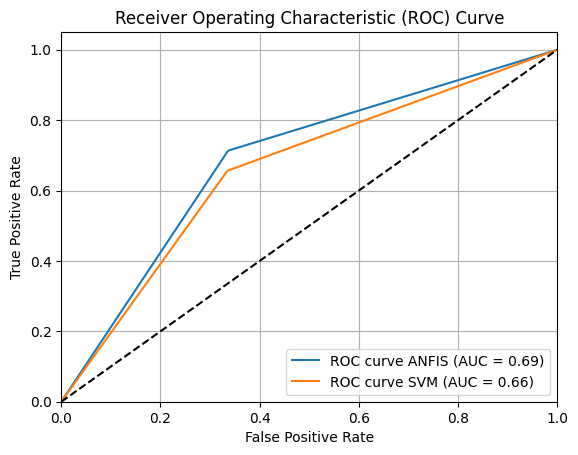

In [31]:
anfis_fpr, anfis_tpr, anfis_thresholds = roc_curve(y_test, anfis_pred)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_pred)

# Plot the ROC curve
plt.plot(anfis_fpr, anfis_tpr, label='ROC curve ANFIS (AUC = %0.2f)' % anfis_auc)
plt.plot(svm_fpr, svm_tpr, label='ROC curve SVM (AUC = %0.2f)' % svm_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("roc_curve.png")
plt.show()